# 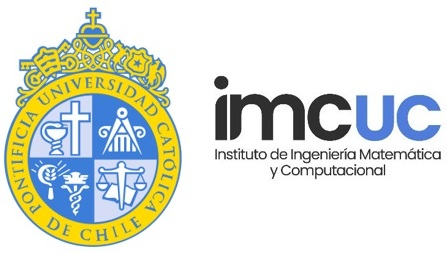  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 15: Exploración de Datos</center></h1>

Este notebook continua el trabajo anterior, con el objetivo que los estudiantes del curso aprendan diferentes comandos y técnicas en Python y, en particular, en Pandas, para la exploración de datos.

## 1. Datos a analizar

El archivo `datasaurus.csv` posee un conjunto de datos en dos dimensiones (es decir son puntos de la forma (x,y)), con 12 diferentes conjuntos. Los datos fueron creados por Justin Matejka y George Fitzmaurice de Autodesk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Lectura de los datos

In [2]:
data = pd.read_csv('datasaurus.csv')

In [3]:
data.tail()

,dataset,x,y
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751
1845,wide_lines,34.583829,89.588902


In [4]:
datasets = data.dataset.unique()
datasets

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

## 2. Estadísticas de resumen 

Ahora analicemos las estadísticas principales de cada conjunto de datos para ver qué observamos.

### 2.1 Elegir un conjunto

In [5]:
conjunto = 'h_lines'
data_select = data[data['dataset']==conjunto]

### 2.2 Calcular estadísticas

In [6]:
data_select.describe()

,x,y
count,142.000000,142.000000
mean,54.261442,47.830252
std,16.765898,26.939876
min,22.003709,10.463915
25%,42.293828,30.479911
50%,53.069678,50.473527
75%,66.768274,70.349471
max,98.288123,90.458936


In [7]:
data_select[['x', 'y']].mean()

x    54.261442
y    47.830252
dtype: float64

In [8]:
data_select[['x', 'y']].median()

x    53.069678
y    50.473527
dtype: float64

In [9]:
data_select[['x', 'y']].var()

x    281.095333
y    725.756931
dtype: float64

In [10]:
data_select[['x', 'y']].std()

x    16.765898
y    26.939876
dtype: float64

In [11]:
data_select[['x', 'y']].quantile(0.25)

x    42.293828
y    30.479911
Name: 0.25, dtype: float64

### 2.2 Calcular correlación

In [12]:
corr = data_select['x'].corr(data_select['y'])
corr

-0.0617148379566778

In [13]:
corr = data_select['y'].corr(data_select['x'])
corr

-0.06171483795667781

Ahora prueben ustedes con otro conjunto. ¿Qué observan de las estadísticas de resumen? ¿Qué podrían concluir de esos valores?

In [14]:
conjunto = 'x_shape'
data_select = data[data['dataset']==conjunto]
data_select.describe()

,x,y
count,142.000000,142.000000
mean,54.260150,47.839717
std,16.769958,26.930002
min,31.106867,4.577661
25%,40.091656,23.470809
50%,47.136458,39.876211
75%,71.856923,73.609634
max,85.446186,97.837615


In [15]:
corr = data_select['x'].corr(data_select['y'])
corr

-0.06558333731006559

### 2.3 Revisando un poco más.

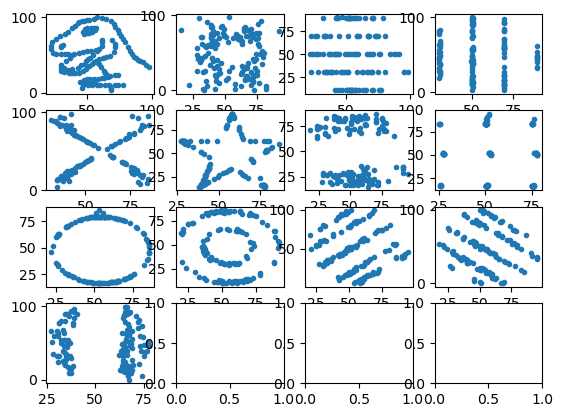

In [16]:
fig, axs = plt.subplots(4, 4)

for i in range(len(datasets)):
    # selecciona el set
    data_select = data[data['dataset']==datasets[i]]
    # grafica
    axs[int(np.floor(i/4)), i%4].plot(data_select['x'], data_select['y'], '.')